In [1]:
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 실행 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# MNIST 손글씨 숫자 데이터 입력
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 가로 28x 세로 28, 학습 데이터 6만장, 테스트 데이터 1만장.

11501568/11490434 [==============================] - 0s 0us/step



처음 8개 레이블 : 50419213

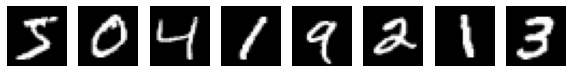

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#MNIST 숫자 데이터 그림 출력 (처음 8개만)
print("\n처음 8개 레이블 : ",end='')
plt.figure(figsize=(10,5)) # 전체 그림 크기
for i in range(8):
    arr = plt.subplot(1,8,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    plt.gray()  # 그림 흑백으로 출력
    arr.axis('off') # 즉 표시 안 함
    print(y_train[i],end='')

In [4]:
X_train = X_train.reshape(60000, 28*28) # (60000,28,28)를 (60000,784)로 변경
X_test = X_test.reshape(10000, 28*28)   # (10000,28,28)를 (10000,784)로 변경
print(X_train[0])   # 이걸로 확인하는게 확실. (28,28)이 (784)로 변경된 것 확인 가능.

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# 최적의 파라미터로 완성된 모델에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
y_pred = clf.predict(X_test)  # 테스트 데이터(X_test)에 대해 예측 실행

# 정답 (레이블)과 예측값을 비교하여 정밀도, 재현율, F1 점수 출력
print(classification_report(y_test, y_pred))
print() # 빈 줄 추가
print("accuracy : "+ str(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


accuracy : 0.969


In [10]:
import pandas as pd

#실제값과 예측된 값 확인
comparison = pd.DataFrame({'실제값':y_test,'예측값':y_pred})
comparison

,실제값,예측값
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5
